# Project 1 (Due Nov 13)

The goal of the first project is to non-parametrically model some phenomenon of interest, and generate sequences of values. There are six options below:

- Chordonomicon: 680,000 chord progressions of popular music songs. Create a chord generator, similar to what we did with Bach in class, but for a particular artist or genre. (https://github.com/spyroskantarelis/chordonomicon)
- Financial Time series, S&P500 Stocks: There are 500 time series here. Model how individual time series adjust over time, either together or separately. (https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks)
- MIT-BIT Arrythmia Database: Arrythmia is an abnormal heart rhythm. This is a classic dataset that a day of ECG time series measurements for 4,000 patients. (https://www.physionet.org/content/mitdb/1.0.0/)
- Ukraine conflict monitor: The ACLED Ukraine Conflict Monitor provides near real-time information on the ongoing war in Ukraine, including an interactive map, a curated data file, and weekly situation updates Ukraine Conflict Monitor, maintained by the Armed Conflict Location & Event Data Project, starting in 2022, including battles, explosions/remote violence, violence against civilians, protests, and riots:
https://acleddata.com/monitor/ukraine-conflict-monitor
- SIPRI Arms Trade: The SIPRI Arms Transfers Database is a comprehensive public resource tracking all international transfers of major conventional arms from 1950 to the present. For each deal, information includes: number ordered, supplier/recipient identities, weapon types, delivery dates, and deal comments. The database can address questions about: who are suppliers and recipients of major weapons, what weapons have been transferred by specific countries, and how supplier-recipient relationships have changed over time.
https://www.sipri.org/databases/armstransfers
- Environmental Protection Agency data: The EPA, in general, has excellent data on the release of toxic substances, and I also tracked down air quality and asthma. You can put these together to look at how changes in toxic release correlate with air quality and respiratory disease over time:
https://www.epa.gov/data
https://www.epa.gov/toxics-release-inventory-tri-program/tri-toolbox
https://www.cdc.gov/asthma/most_recent_national_asthma_data.htm
https://www.earthdata.nasa.gov/topics/atmosphere/air-quality/data-access-tools

If you have other data sources that you're interested in, I am willing to consider them, as long as they lend themselves to an interesting analysis.

Submit a document or notebook that clearly addresses the following:
1. Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why? (10/100 pts)
2. What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate. (10/100 pts)
3. Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome? (15/100 pts)
4. Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential). (15/100 pts)
5. Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? (15/100 pts)
6. Write a conclusion that explains the limitations of your analysis and potential for future work on this topic. (10/100 pts)

In addition, submit a GitHub repo containing your code and a description of how to obtain the original data from the source. Make sure the code is commented, where appropriate. Include a .gitignore file. We will look at your commit history briefly to determine whether everyone in the group contributed. (10/100 pts)

In class, we'll briefly do presentations and criticize each other's work, and participation in your group's presentation and constructively critiquing the other groups' presentations accounts for the remaining 15/100 pts.


In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('trade-register.csv', encoding='latin-1', skiprows = 11)

In [4]:
data

,Recipient,Supplier,Year of order,,Number ordered,.1,Weapon designation,Weapon description,Number delivered,.2,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,NaN,24.0,NaN,M-114 155mm,towed gun,24.0,NaN,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,?,188.0,?,M-113,armoured personnel carrier,188.0,?,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,NaN,53.0,NaN,S-70 Black Hawk,transport helicopter,53.0,?,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,?,100.0,?,T-62,tank,100.0,?,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,?,500.0,?,T-55,tank,500.0,?,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28345,Zimbabwe,China,2004.0,?,10.0,?,Type-85,armoured personnel carrier,10.0,?,2004,New,NaN,0.30,3.00,3.00
28346,Zimbabwe,China,2004.0,?,5.0,?,Type-89/ZSD-89,armoured personnel carrier,5.0,?,2004,New,ARV version,0.30,1.50,1.50
28347,Zimbabwe,Soviet Union,1975.0,?,15.0,?,T-34-85,tank,15.0,?,1975,Second hand,Second-hand; supplier uncertain,0.38,5.70,5.70
28348,Zimbabwe,Ukraine,2005.0,NaN,6.0,NaN,AI-25,turbofan,6.0,NaN,2005,New,For 6 K-8 trainer aircraft from China,0.60,3.60,3.60


In [5]:
data = data.drop(data.columns[[3, 5, 9]], axis=1)

In [6]:
data.head()

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,24.0,M-114 155mm,towed gun,24.0,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,188.0,M-113,armoured personnel carrier,188.0,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,53.0,S-70 Black Hawk,transport helicopter,53.0,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,100.0,T-62,tank,100.0,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,500.0,T-55,tank,500.0,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00


In [7]:
# Lets look at the number of missing values in each column

data.isnull().sum()

Recipient                            2
Supplier                             0
Year of order                        0
Number ordered                     110
Weapon designation                   2
Weapon description                   2
Number delivered                     2
Year(s) of delivery                  2
status                               2
Comments                          5179
SIPRI TIV per unit                   4
SIPRI TIV for total order            4
SIPRI TIV of delivered weapons       4
dtype: int64

In [8]:
data[data["SIPRI TIV of delivered weapons"].isna()]

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
24138,Thailand,Ukraine,2008.0,14.0,BTR-3,armoured personnel carrier,13.0,2010; 2012,New,Part of THB4b ($120 m) deal (for 96 BTR-3 in s...,NaN,NaN,NaN
24139,NaN,0.25,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26821,United Nations**,Israel,2015.0,3.0,Hermes-900,UAV,3.0,2016,New,3-year lease; for use with UN peacekeeping for...,NaN,NaN,NaN
26822,NaN,3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.drop([24139, 26822], axis=0)

In [10]:
data[data["SIPRI TIV of delivered weapons"].isna()]

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
24138,Thailand,Ukraine,2008.0,14.0,BTR-3,armoured personnel carrier,13.0,2010; 2012,New,Part of THB4b ($120 m) deal (for 96 BTR-3 in s...,NaN,NaN,NaN
26821,United Nations**,Israel,2015.0,3.0,Hermes-900,UAV,3.0,2016,New,3-year lease; for use with UN peacekeeping for...,NaN,NaN,NaN


In [11]:
#show all weapon decsriptions that are UAV

data[data["Weapon description"] == "UAV"]


,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
31,Afghanistan,United States,2015.0,65.0,ScanEagle,UAV,65.0,2016; 2017; 2018,New,$71 m deal,0.04,2.60,2.60
32,Afghanistan,United States,2018.0,35.0,ScanEagle,UAV,35.0,2019,New,$58 m deal (incl operational support),0.04,1.40,1.40
33,Afghanistan,United States,2017.0,5.0,ScanEagle,UAV,5.0,2018,New,$19.6 m deal,0.04,0.20,0.20
154,African Union**,Israel,2017.0,3.0,Aerostar,UAV,3.0,2018,New,For use by AU peacekeeping forces in Somalia; ...,0.10,0.30,0.30
321,Algeria,UAE,2013.0,5.0,Yabhon Flash-20,UAV,5.0,2018; 2019,New,Possibly assembled/produced under licence in A...,3.25,16.25,16.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191,unknown recipient(s),Israel,2015.0,2.0,Hermes-900,UAV,2.0,2016,New,Part of $70 m deal; recipient is Latin America...,3.00,6.00,6.00
27473,Venezuela,Iran,2007.0,12.0,Mohajer,UAV,12.0,2012; 2013,New,Probably Mohajer-3 version; Venezuelan designa...,0.10,1.20,1.20
27683,Viet Nam,United States,2019.0,6.0,ScanEagle,UAV,6.0,2022,New,'Maritime Security Initiative' aid; for coast ...,0.04,0.24,0.24
27898,Viet Nam,Israel,2018.0,3.0,Heron,UAV,3.0,2021,New,$120-160 m deal; incl for maritime patrol; del...,3.00,9.00,9.00


In [12]:
data.head()

,Recipient,Supplier,Year of order,Number ordered,Weapon designation,Weapon description,Number delivered,Year(s) of delivery,status,Comments,SIPRI TIV per unit,SIPRI TIV for total order,SIPRI TIV of delivered weapons
0,Afghanistan,Turkiye,2007.0,24.0,M-114 155mm,towed gun,24.0,2007,Second hand,Second-hand; aid,0.20,4.80,4.80
1,Afghanistan,United States,2004.0,188.0,M-113,armoured personnel carrier,188.0,2005,Second hand,Second-hand; aid; M-113A2 version; incl 15 M-5...,0.10,18.80,18.80
2,Afghanistan,United States,2016.0,53.0,S-70 Black Hawk,transport helicopter,53.0,2017; 2018; 2019; 2020,Second hand but modernized,Second-hand UH-60A modernized to UH-60A+ befor...,4.29,227.37,227.37
3,Afghanistan,Soviet Union,1973.0,100.0,T-62,tank,100.0,1975; 1976,New,NaN,1.80,180.00,180.00
4,Afghanistan,Soviet Union,1978.0,500.0,T-55,tank,500.0,1979; 1980; 1981; 1982; 1983; 1984; 1985; 1986...,Second hand,Second-hand; aid,0.50,250.00,250.00


## Question 1

The data provides an overview of the arms trade that has happened since 1950 between countries. It provides the recieving country, the supplier country, the type of arms, the number of arms, the date of the deal, comments of the deal, and the SIPRI TIV. TIV is a universal unit describing the military capability of a weapon based on volume rather than financial cost. The data can be found in the following link: https://www.sipri.org/databases/armstransfers from The Stockholm International Peace Research Institute. They created the database in order for analysts, researchers, policymakers, and the media to better understand the arms trade and learn how it has changed over time. We did not find any missing data in the dataset however we did find a few extra columns that were not useful and some extra rows and values that were not useful.

## Question 3

In [13]:
markov_data = data[["Recipient", "Year of order", "SIPRI TIV for total order"]].dropna()

In [14]:
markov_data["Support"] = pd.qcut(
    markov_data["SIPRI TIV for total order"],
    q=[0, 0.4, 0.8, 1.0],
    labels=["Low", "Medium", "High"]
)

In [15]:
def transition_matrix(series):
  series = series.dropna()
  states = sorted(set(series))
  matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

  for i in range(len(series) - 1):
    a = series.iloc[i]
    b = series.iloc[i + 1]
    matrix.loc[a, b] += 1

  matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
  return matrix

In [16]:
test_df = markov_data[markov_data["Recipient"].isin(["Viet Nam", "South Vietnam", "Viet Cong (South Vietnam)*", "Viet Minh (France)*"])]
test_df

,Recipient,Year of order,SIPRI TIV for total order,Support
21974,South Vietnam,1962.0,75.00,High
21975,South Vietnam,1966.0,9.60,Low
21976,South Vietnam,1963.0,6.30,Low
21977,South Vietnam,1967.0,75.00,High
21978,South Vietnam,1967.0,1270.00,High
...,...,...,...,...
27927,Viet Nam,1979.0,15.00,Medium
27928,Viet Nam,1979.0,36.25,Medium
27929,Viet Nam,1980.0,40.00,Medium
27930,Viet Nam,1979.0,15.00,Medium


In [17]:
vietnam_aliases = [
    "Viet Nam",
    "South Vietnam",]

markov_data["Recipient"] = markov_data["Recipient"].replace(vietnam_aliases, "Vietnam")
markov_data["Recipient"].unique()

array(['Afghanistan', 'African Union**', 'Albania', 'Algeria',
       'Amal (Lebanon)*', 'ANC (South Africa)*', 'Angola',
       'Anti-Castro rebels (Cuba)*', 'Antigua and Barbuda', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Darfur rebels (Sudan)*', 'Denmark',
       'Djibouti', 'Dominican Republic', 'DR Congo', 'East Germany (GDR)',
       'Ecuador', 'Egypt', 'El Salvador', 'ELF (Ethiopia)*',
       'EPLF (Ethiopia)*', 'Equatorial

Transition Matrix for Vietnam:
            High       Low    Medium
High    0.344828  0.181034  0.474138
Low     0.231707  0.195122  0.573171
Medium  0.351852  0.271605  0.376543


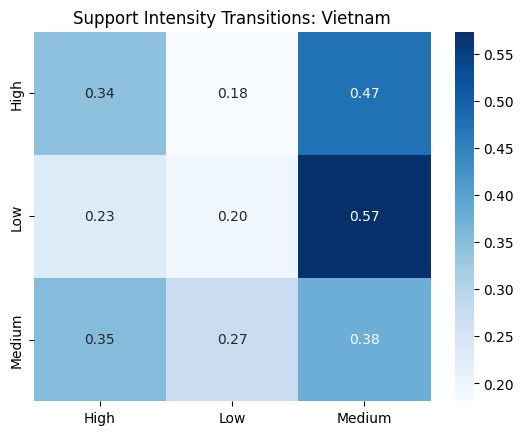

In [20]:
#Analyze One Country
country = "Vietnam"
country_data = markov_data[markov_data["Recipient"] == country].sort_values("Year of order")

matrix = transition_matrix(country_data["Support"])
print(f"Transition Matrix for {country}:")
print(matrix)

sns.heatmap(matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title(f"Support Intensity Transitions: {country}")
plt.show()


--- Pre-War Transitions ---
             Low    Medium
Low     0.700000  0.300000
Medium  0.285714  0.714286

--- War Period Transitions ---
            High       Low    Medium
High    0.461538  0.246154  0.292308
Low     0.309524  0.142857  0.547619
Medium  0.293333  0.253333  0.453333

--- Post-War Transitions ---
            High       Low    Medium
High    0.215686  0.117647  0.666667
Low     0.266667  0.200000  0.533333
Medium  0.397436  0.230769  0.371795


/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/2853818155.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pre = df_germany[pre_war & (markov_data["Recipient"] == country)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/2853818155.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  during = df_germany[war & (markov_data["Recipient"] == country)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/2853818155.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  post = df_germany[post_war & (markov_data["Recipient"] == country)].sort_values("Year of order")


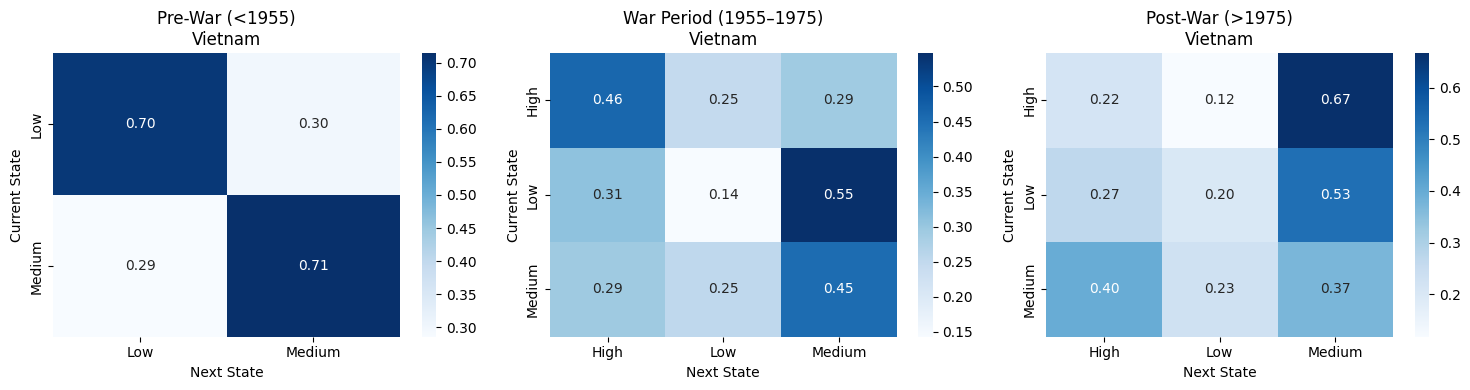

In [21]:
pre_war = (markov_data["Year of order"] <= 1954)
war = (markov_data["Year of order"].between(1955, 1975))
post_war = (markov_data["Year of order"] >= 1976)

country = "Vietnam"


df_germany = markov_data[markov_data["Recipient"] == country]

pre = df_germany[pre_war & (markov_data["Recipient"] == country)].sort_values("Year of order")
during = df_germany[war & (markov_data["Recipient"] == country)].sort_values("Year of order")
post = df_germany[post_war & (markov_data["Recipient"] == country)].sort_values("Year of order")


tm_pre = transition_matrix(pre["Support"])
tm_during = transition_matrix(during["Support"])
tm_post = transition_matrix(post["Support"])


print("\n--- Pre-War Transitions ---")
print(tm_pre)
print("\n--- War Period Transitions ---")
print(tm_during)
print("\n--- Post-War Transitions ---")
print(tm_post)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, tm, title in zip(axes, [tm_pre, tm_during, tm_post],
                         ["Pre-War (<1955)", "War Period (1955–1975)", "Post-War (>1975)"]):
    sns.heatmap(tm, annot=True, cmap="Blues", fmt=".2f", ax=ax)
    ax.set_title(f"{title}\n{country}")
    ax.set_xlabel("Next State")
    ax.set_ylabel("Current State")

plt.tight_layout()
plt.show()

## Question 4

In [22]:
STATE_ORDER = ["Low", "Medium", "High"]

markov_data["Support"] = pd.Categorical(markov_data["Support"],
                                        categories=STATE_ORDER,
                                        ordered=True)

def normalize_rows(df_tm: pd.DataFrame) -> pd.DataFrame:
    return df_tm.div(df_tm.sum(axis=1), axis=0).fillna(0)

tm_pre = normalize_rows(tm_pre.reindex(index=STATE_ORDER, columns=STATE_ORDER, fill_value=0))
tm_during = normalize_rows(tm_during.reindex(index=STATE_ORDER, columns=STATE_ORDER, fill_value=0))
tm_post = normalize_rows(tm_post.reindex(index=STATE_ORDER, columns=STATE_ORDER, fill_value=0))

In [23]:
afghan_aliases = [
    "Afghanistan",
    "Mujahedin (Afghanistan)*",
    "Northern Alliance (Afghanistan)*"]

af_df = markov_data.copy()
af_df["Recipient"] = af_df["Recipient"].replace(afghan_aliases, "Afghanistan")

af_df = af_df[af_df["Recipient"] == "Afghanistan"].sort_values("Year of order")

af_pre = af_df[af_df["Year of order"] <= 2000].copy()
af_war = af_df[(af_df["Year of order"] >= 2001) & (af_df["Year of order"] <= 2021)].copy()

def state_props(series):
    vc = series.value_counts().reindex(STATE_ORDER, fill_value=0).to_numpy()
    return vc / vc.sum() if vc.sum() > 0 else np.zeros(len(STATE_ORDER))

props_af_pre_actual = state_props(af_pre["Support"])
props_af_war_actual = state_props(af_war["Support"])

print("Afghanistan (actual) pre-war props [Low, Medium, High]:", np.round(props_af_pre_actual, 3))
print("Afghanistan (actual) war props   [Low, Medium, High]:", np.round(props_af_war_actual, 3))


Afghanistan (actual) pre-war props [Low, Medium, High]: [0.284 0.411 0.305]
Afghanistan (actual) war props   [Low, Medium, High]: [0.397 0.397 0.205]


In [24]:
rng = np.random.default_rng(42)
def simulate_markov_df(tm_df: pd.DataFrame, start_state: str, T: int, rng) -> list:
    states = list(tm_df.index)
    seq = [start_state]
    for _ in range(T - 1):
        p = tm_df.loc[seq[-1], states].to_numpy()
        seq.append(rng.choice(states, p=p))
    return seq

def simulate_many(tm_df: pd.DataFrame, T: int, N: int = 2000, start_state: str | None = None, rng=None) -> np.ndarray:
    rng = np.random.default_rng() if rng is None else rng
    states = list(tm_df.index)
    if start_state is None:
        v = np.ones(len(states)) / len(states)
        P = tm_df.loc[states, states].to_numpy()
        for _ in range(200):
            v = v @ P
        pi = v / v.sum()
    else:
        pi = np.eye(len(states))[states.index(start_state)]

    sims = []
    for _ in range(N):
        s0 = rng.choice(states, p=pi)
        sims.append(simulate_markov_df(tm_df, s0, T, rng))
    return np.array(sims)

In [25]:
start_pre = af_pre["Support"].iloc[0] if len(af_pre) else STATE_ORDER[0]
start_war = af_war["Support"].iloc[0] if len(af_war) else STATE_ORDER[0]

S_pre = simulate_many(tm_pre, T=len(af_pre),  N=2000, start_state=start_pre, rng=rng)
S_war = simulate_many(tm_during, T=len(af_war), N=2000, start_state=start_war, rng=rng)

def summarize_props(sim_seqs: np.ndarray) -> np.ndarray:
    props = []
    for seq in sim_seqs:
        s = pd.Series(seq, dtype="category")
        vc = s.value_counts().reindex(STATE_ORDER, fill_value=0).to_numpy()
        props.append(vc / vc.sum() if vc.sum() else np.zeros(len(STATE_ORDER)))
    return np.vstack(props)

props_pre_sims = summarize_props(S_pre)
props_war_sims = summarize_props(S_war)

def ci95(arr):
    return np.percentile(arr, [2.5, 50, 97.5], axis=0)

lo_pre, med_pre, hi_pre   = ci95(props_pre_sims)
lo_war, med_war, hi_war   = ci95(props_war_sims)

,Actual (AFG ≤ 2000),Sim median (VN pre-war),Sim 95% low,Sim 95% high
Low,0.284,0.495,0.347,0.642
Medium,0.411,0.505,0.358,0.653
High,0.305,0.000,0.000,0.000


,Actual (AFG 2001–2021),Sim median (VN war),Sim 95% low,Sim 95% high
Low,0.397,0.231,0.154,0.321
Medium,0.397,0.410,0.295,0.526
High,0.205,0.346,0.231,0.474


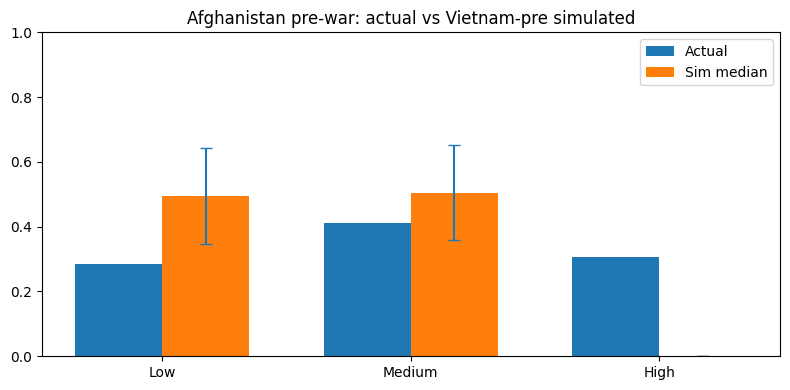

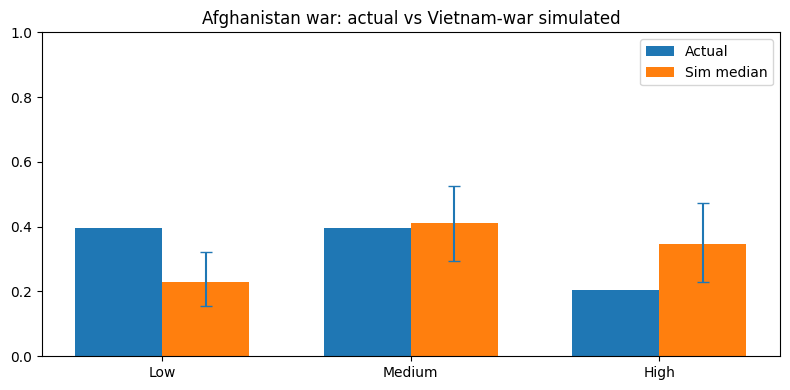

In [26]:
pre_table = pd.DataFrame({
    "Actual (AFG ≤ 2000)": props_af_pre_actual,
    "Sim median (VN pre-war)": med_pre,
    "Sim 95% low": lo_pre,
    "Sim 95% high": hi_pre
}, index=STATE_ORDER).round(3)

war_table = pd.DataFrame({
    "Actual (AFG 2001–2021)": props_af_war_actual,
    "Sim median (VN war)": med_war,
    "Sim 95% low": lo_war,
    "Sim 95% high": hi_war
}, index=STATE_ORDER).round(3)

display(pre_table)
display(war_table)

def plot_comp(actual, med, lo, hi, title):
    x = np.arange(len(STATE_ORDER))
    width = 0.35
    plt.figure(figsize=(8,4))
    plt.bar(x - width/2, actual, width, label='Actual')
    plt.bar(x + width/2, med, width, label='Sim median')
    yerr = np.vstack([med - lo, hi - med])
    plt.errorbar(x + width/2, med, yerr=yerr, fmt='none', capsize=4)
    plt.xticks(x, STATE_ORDER); plt.ylim(0, 1)
    plt.title(title); plt.legend(); plt.tight_layout(); plt.show()

plot_comp(props_af_pre_actual, med_pre, lo_pre, hi_pre,
          "Afghanistan pre-war: actual vs Vietnam-pre simulated")

plot_comp(props_af_war_actual, med_war, lo_war, hi_war,
          "Afghanistan war: actual vs Vietnam-war simulated")


In [27]:
def chi_square(p, q, eps=1e-9):
    p = np.asarray(p) + eps
    q = np.asarray(q) + eps
    return np.sum((p - q)**2 / q)

print("Chi-square distance (pre-war):", chi_square(props_af_pre_actual, med_pre))
print("Chi-square distance (war):    ", chi_square(props_af_war_actual, med_war))


Chi-square distance (pre-war): 93185595.67521587
Chi-square distance (war):     0.17822590149567322


The simulated sequences for Afghanistan only partially share the properties of the Vietnam training data. When using the Vietnam pre-war transition matrix, the generated Afghanistan pre-war sequences fail to reproduce the frequency of high-intensity import years because the Vietnam pre-war data itself contained almost no transitions into the “High” state, leading to underestimation of major import events. In contrast, sequences generated from the Vietnam war-period matrix more closely resemble Afghanistan's wartime dynamics, as both exhibit persistent medium-to-high import states and similar state proportions that fall within the simulated 95% confidence intervals. While the war-period estimates are credible, with a small chi-square distance indicating a good fit, there remains substantial uncertainty due to small sample sizes, wide confidence bands, and differences in geopolitical context between the two countries. Overall, the model captures the general wartime behavior of sustained arms inflows but lacks reliability for pre-war conditions, as the Vietnam data do not adequately represent Afghanistan's earlier arms trade patterns.

In [29]:
afghan_alliases = [
    "Afghanistan",
    "Mujahedin (Afghanistan)*",
    "Northern Alliance (Afghanistan)*"]

markov_data["Recipient"] = markov_data["Recipient"].replace(afghan_alliases, "Afghanistan")
markov_data["Recipient"].unique()



array(['Afghanistan', 'African Union**', 'Albania', 'Algeria',
       'Amal (Lebanon)*', 'ANC (South Africa)*', 'Angola',
       'Anti-Castro rebels (Cuba)*', 'Antigua and Barbuda', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Darfur rebels (Sudan)*', 'Denmark',
       'Djibouti', 'Dominican Republic', 'DR Congo', 'East Germany (GDR)',
       'Ecuador', 'Egypt', 'El Salvador', 'ELF (Ethiopia)*',
       'EPLF (Ethiopia)*', 'Equatorial

Transition Matrix for Afghanistan:
            High       Low    Medium
High    0.344828  0.181034  0.474138
Low     0.231707  0.195122  0.573171
Medium  0.351852  0.271605  0.376543


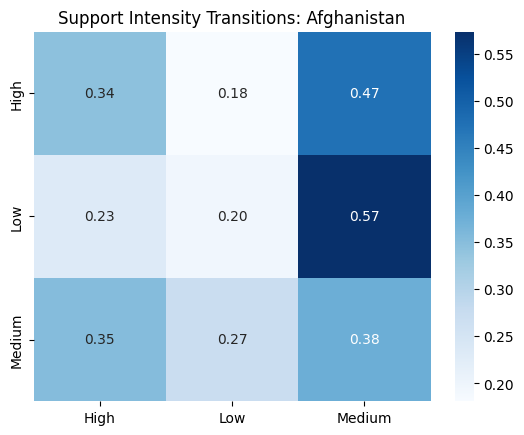

In [30]:
#Analyze One Country
country2 = "Afghanistan"
country_data2 = markov_data[markov_data["Recipient"] == country2].sort_values("Year of order")

matrix2 = transition_matrix(country_data["Support"])
print(f"Transition Matrix for {country2}:")
print(matrix2)

sns.heatmap(matrix2, annot=True, cmap="Blues", fmt=".2f")
plt.title(f"Support Intensity Transitions: {country2}")
plt.show()


--- Pre-War Transitions ---
            High       Low    Medium
High    0.379310  0.275862  0.344828
Low     0.259259  0.370370  0.370370
Medium  0.263158  0.236842  0.500000

--- War Period Transitions ---
            High       Low    Medium
High    0.250000  0.375000  0.375000
Low     0.200000  0.400000  0.400000
Medium  0.193548  0.419355  0.387097

--- Post-War Transitions ---
Empty DataFrame
Columns: []
Index: []


/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/1314107867.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pre2 = df_afghan[pre_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/1314107867.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  during2 = df_afghan[war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
/var/folders/gv/nhwh5kcx6lv1pcx_npbt04gw0000gn/T/ipykernel_55728/1314107867.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  post2 = df_afghan[post_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")


ValueError: zero-size array to reduction operation fmin which has no identity

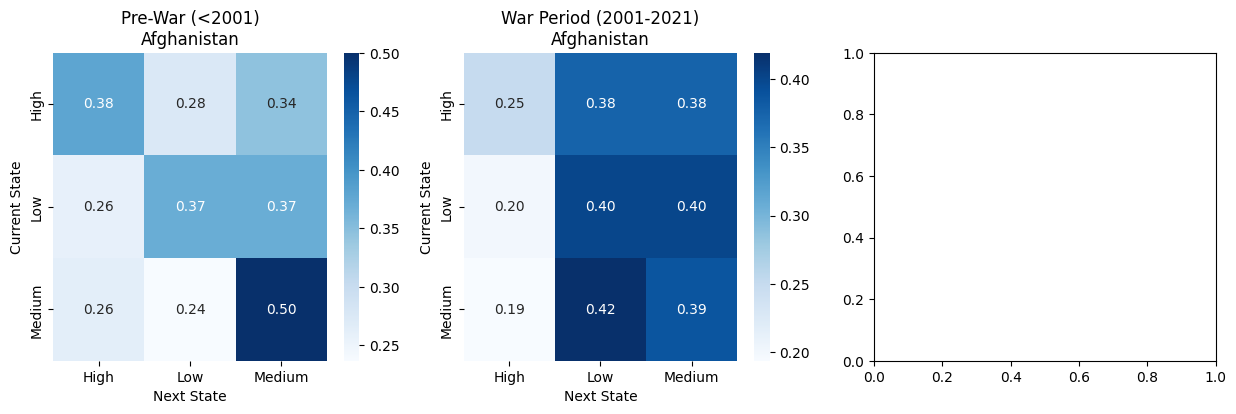

In [31]:
pre_war2 = (markov_data["Year of order"] <= 2000)
war2 = (markov_data["Year of order"].between(2001, 2021))
post_war2 = (markov_data["Year of order"] >= 2022)

country2 = "Afghanistan"


df_afghan = markov_data[markov_data["Recipient"] == country2]

pre2 = df_afghan[pre_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
during2 = df_afghan[war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")
post2 = df_afghan[post_war2 & (markov_data["Recipient"] == country2)].sort_values("Year of order")


tm_pre2 = transition_matrix(pre2["Support"])
tm_during2 = transition_matrix(during2["Support"])
tm_post2 = transition_matrix(post2["Support"])


print("\n--- Pre-War Transitions ---")
print(tm_pre2)
print("\n--- War Period Transitions ---")
print(tm_during2)
print("\n--- Post-War Transitions ---")
print(tm_post2)


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, tm, title in zip(axes, [tm_pre2, tm_during2, tm_post2],
                         ["Pre-War (<2001)", "War Period (2001-2021)", "Post-War (>2021)"]):
    sns.heatmap(tm, annot=True, cmap="Blues", fmt=".2f", ax=ax)
    ax.set_title(f"{title}\n{country2}")
    ax.set_xlabel("Next State")
    ax.set_ylabel("Current State")

plt.tight_layout()
plt.show()

## Question 5